<a href="https://colab.research.google.com/github/jayshah19/CryptoAlgorithm/blob/main/CryptoTredingAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 6.5 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

In [4]:
BTC_CAD = yf.download("BTC-CAD", start='2021-06-22', end='2022-06-22', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [5]:
BTC_CAD.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-22,39116.722656,41028.023438,35776.574219,40018.953125,40018.953125,72593255695
2021-06-23,40031.332031,42663.597656,39115.765625,41497.132812,41497.132812,56994499411
2021-06-24,41447.628906,43395.113281,39851.367188,42714.136719,42714.136719,40817562173
2021-06-25,42710.035156,43729.160156,38532.746094,38885.363281,38885.363281,49446999766
2021-06-26,38832.367188,40114.207031,37120.476562,39559.511719,39559.511719,47424525637


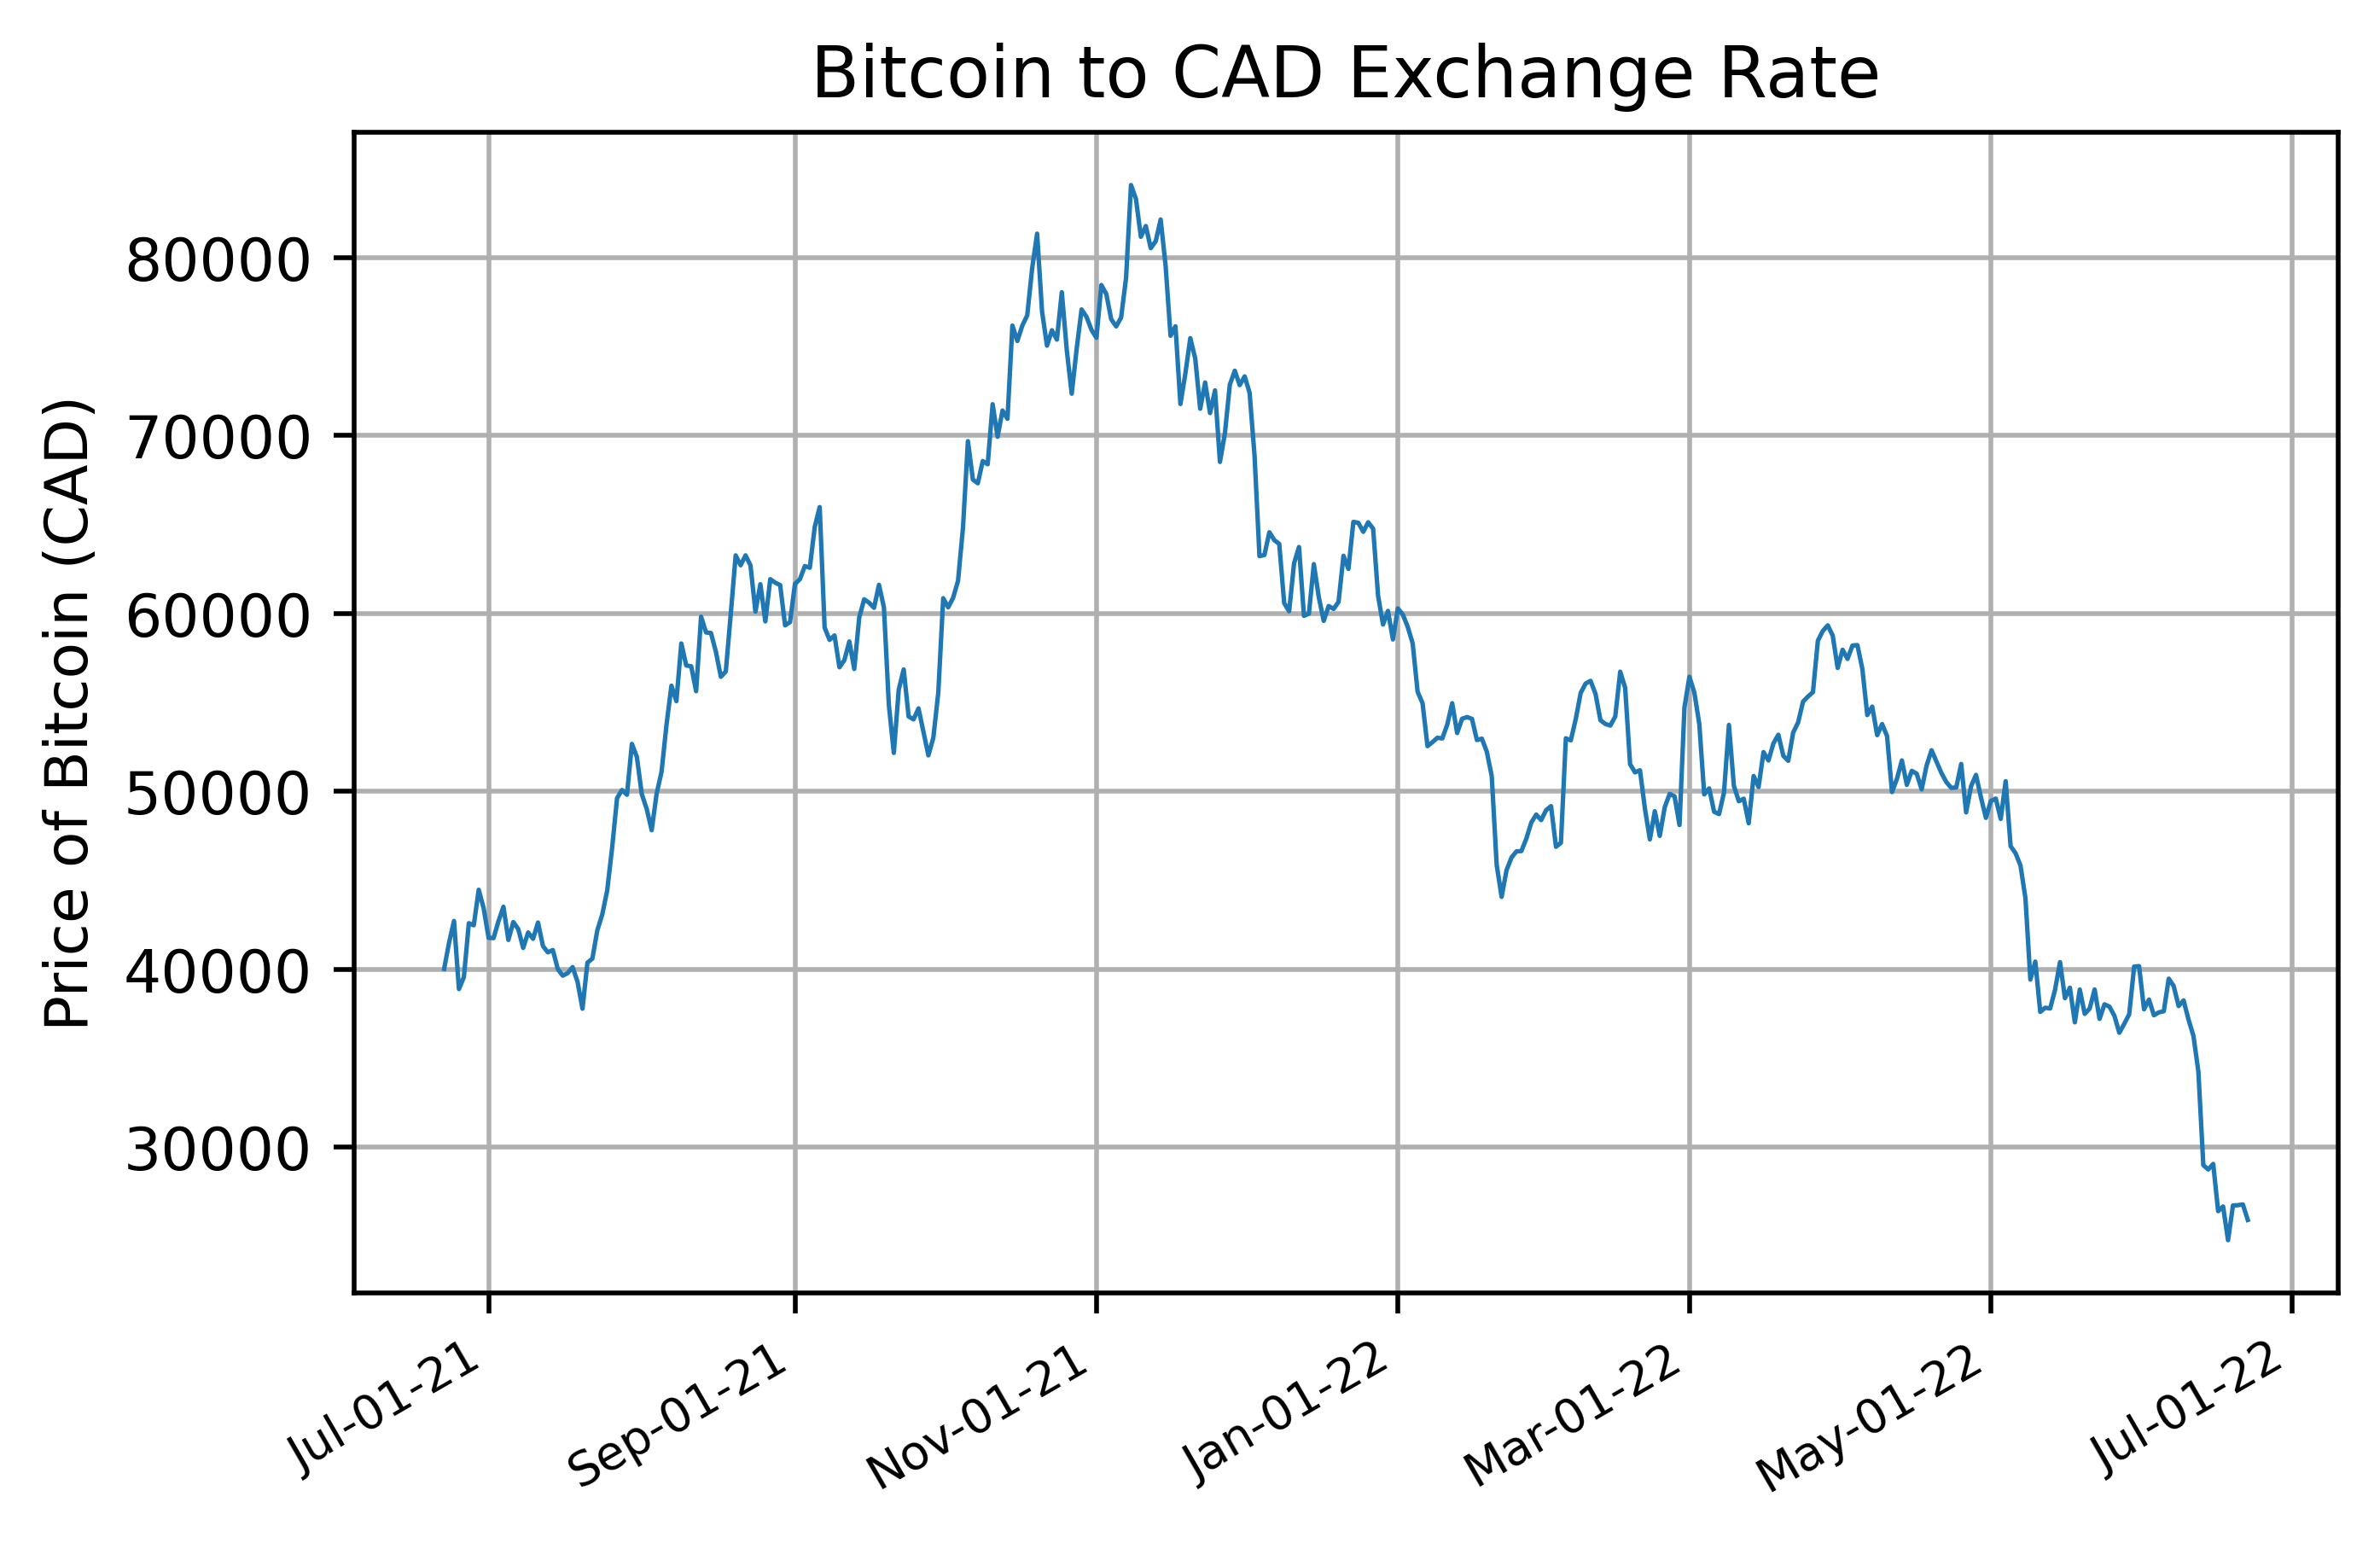

In [6]:
fig, axs = plt.subplots(dpi=500)

date_format = DateFormatter("%h-%d-%y")

axs.xaxis.set_major_formatter(date_format)
axs.tick_params(axis='x', labelsize=8)

fig.autofmt_xdate()

axs.plot(BTC_CAD['Close'], lw=0.75)

axs.set_ylabel('Price of Bitcoin (CAD)')
axs.set_title('Bitcoin to CAD Exchange Rate')

axs.grid()

plt.show()

In [7]:
BTC_CAD['SMA_9'] = BTC_CAD['Close'].rolling(window=9, min_periods=1).mean()

In [8]:
BTC_CAD['SMA_30'] = BTC_CAD['Close'].rolling(window=30, min_periods=1).mean()

In [9]:
BTC_CAD.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_30
Date,,,,,,,,
2022-06-18,26670.833984,27012.945312,23069.113281,24774.376953,24774.376953,54725903315,30259.312934,35718.881901
2022-06-19,24765.597656,26927.501953,23536.169922,26724.597656,26724.597656,45938111198,29097.594184,35359.949089
2022-06-20,26724.724609,27167.345703,25645.339844,26743.371094,26743.371094,40010094692,28040.656684,34991.734766
2022-06-21,26736.564453,27933.203125,26429.441406,26784.601562,26784.601562,37466596738,27211.164062,34589.099089
2022-06-22,26796.003906,26975.734375,25698.697266,25910.384766,25910.384766,37043219273,26868.839844,34212.408398


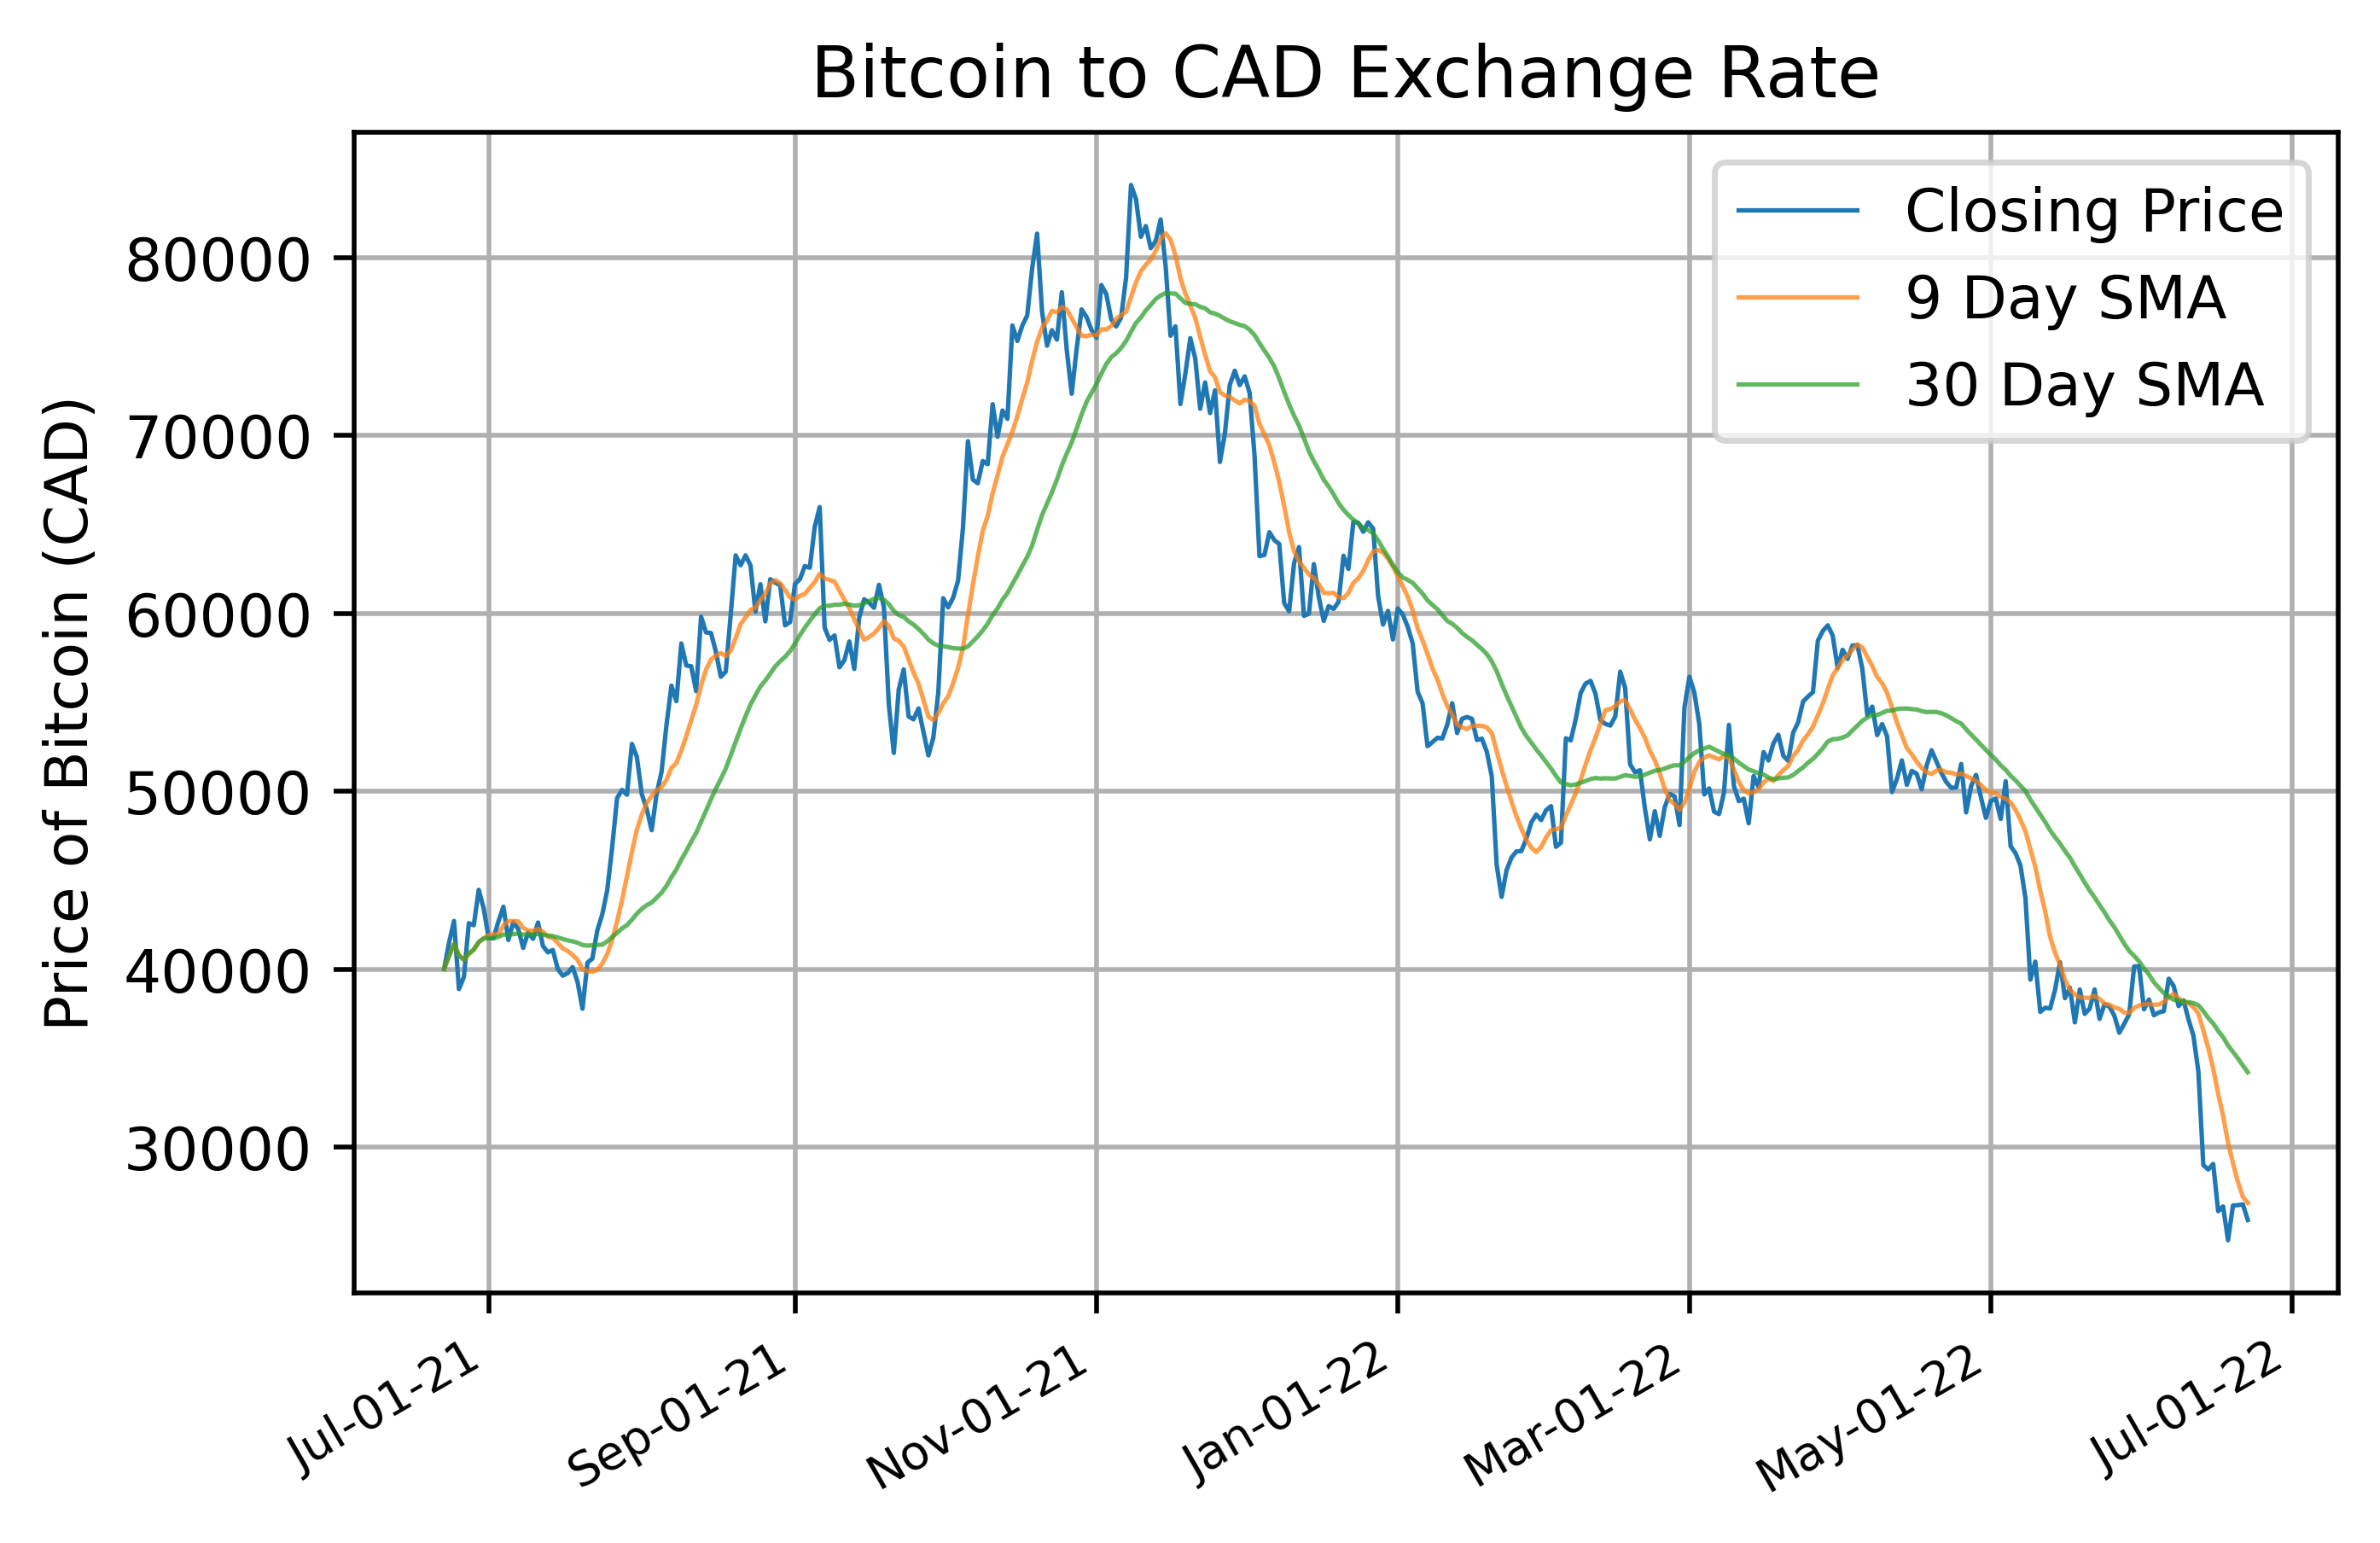

In [10]:
fig, axs = plt.subplots(dpi=500)


date_format = DateFormatter("%h-%d-%y")

axs.xaxis.set_major_formatter(date_format)
axs.tick_params(axis='x', labelsize=8)

fig.autofmt_xdate()


axs.plot(BTC_CAD['Close'], lw=0.75, label='Closing Price') # Added label


axs.plot(BTC_CAD['SMA_9'], lw=0.75, alpha=0.75, label='9 Day SMA')
axs.plot(BTC_CAD['SMA_30'], lw=0.75, alpha=0.75, label='30 Day SMA')



axs.set_ylabel('Price of Bitcoin (CAD)')
axs.set_title('Bitcoin to CAD Exchange Rate')

axs.grid() 
axs.legend() 


plt.show()

In [11]:
trade_signals = pd.DataFrame(index=BTC_CAD.index)


short_interval = 10
long_interval = 40

trade_signals['Short'] = BTC_CAD['Close'].rolling(window=short_interval, min_periods=1).mean()
trade_signals['Long'] = BTC_CAD['Close'].rolling(window=long_interval, min_periods=1).mean()

In [12]:
trade_signals['Signal'] = 0.0

trade_signals['Signal'] = np.where(trade_signals['Short'] > trade_signals['Long'], 1.0, 0.0)  

In [13]:
trade_signals['Position'] = trade_signals['Signal'].diff()

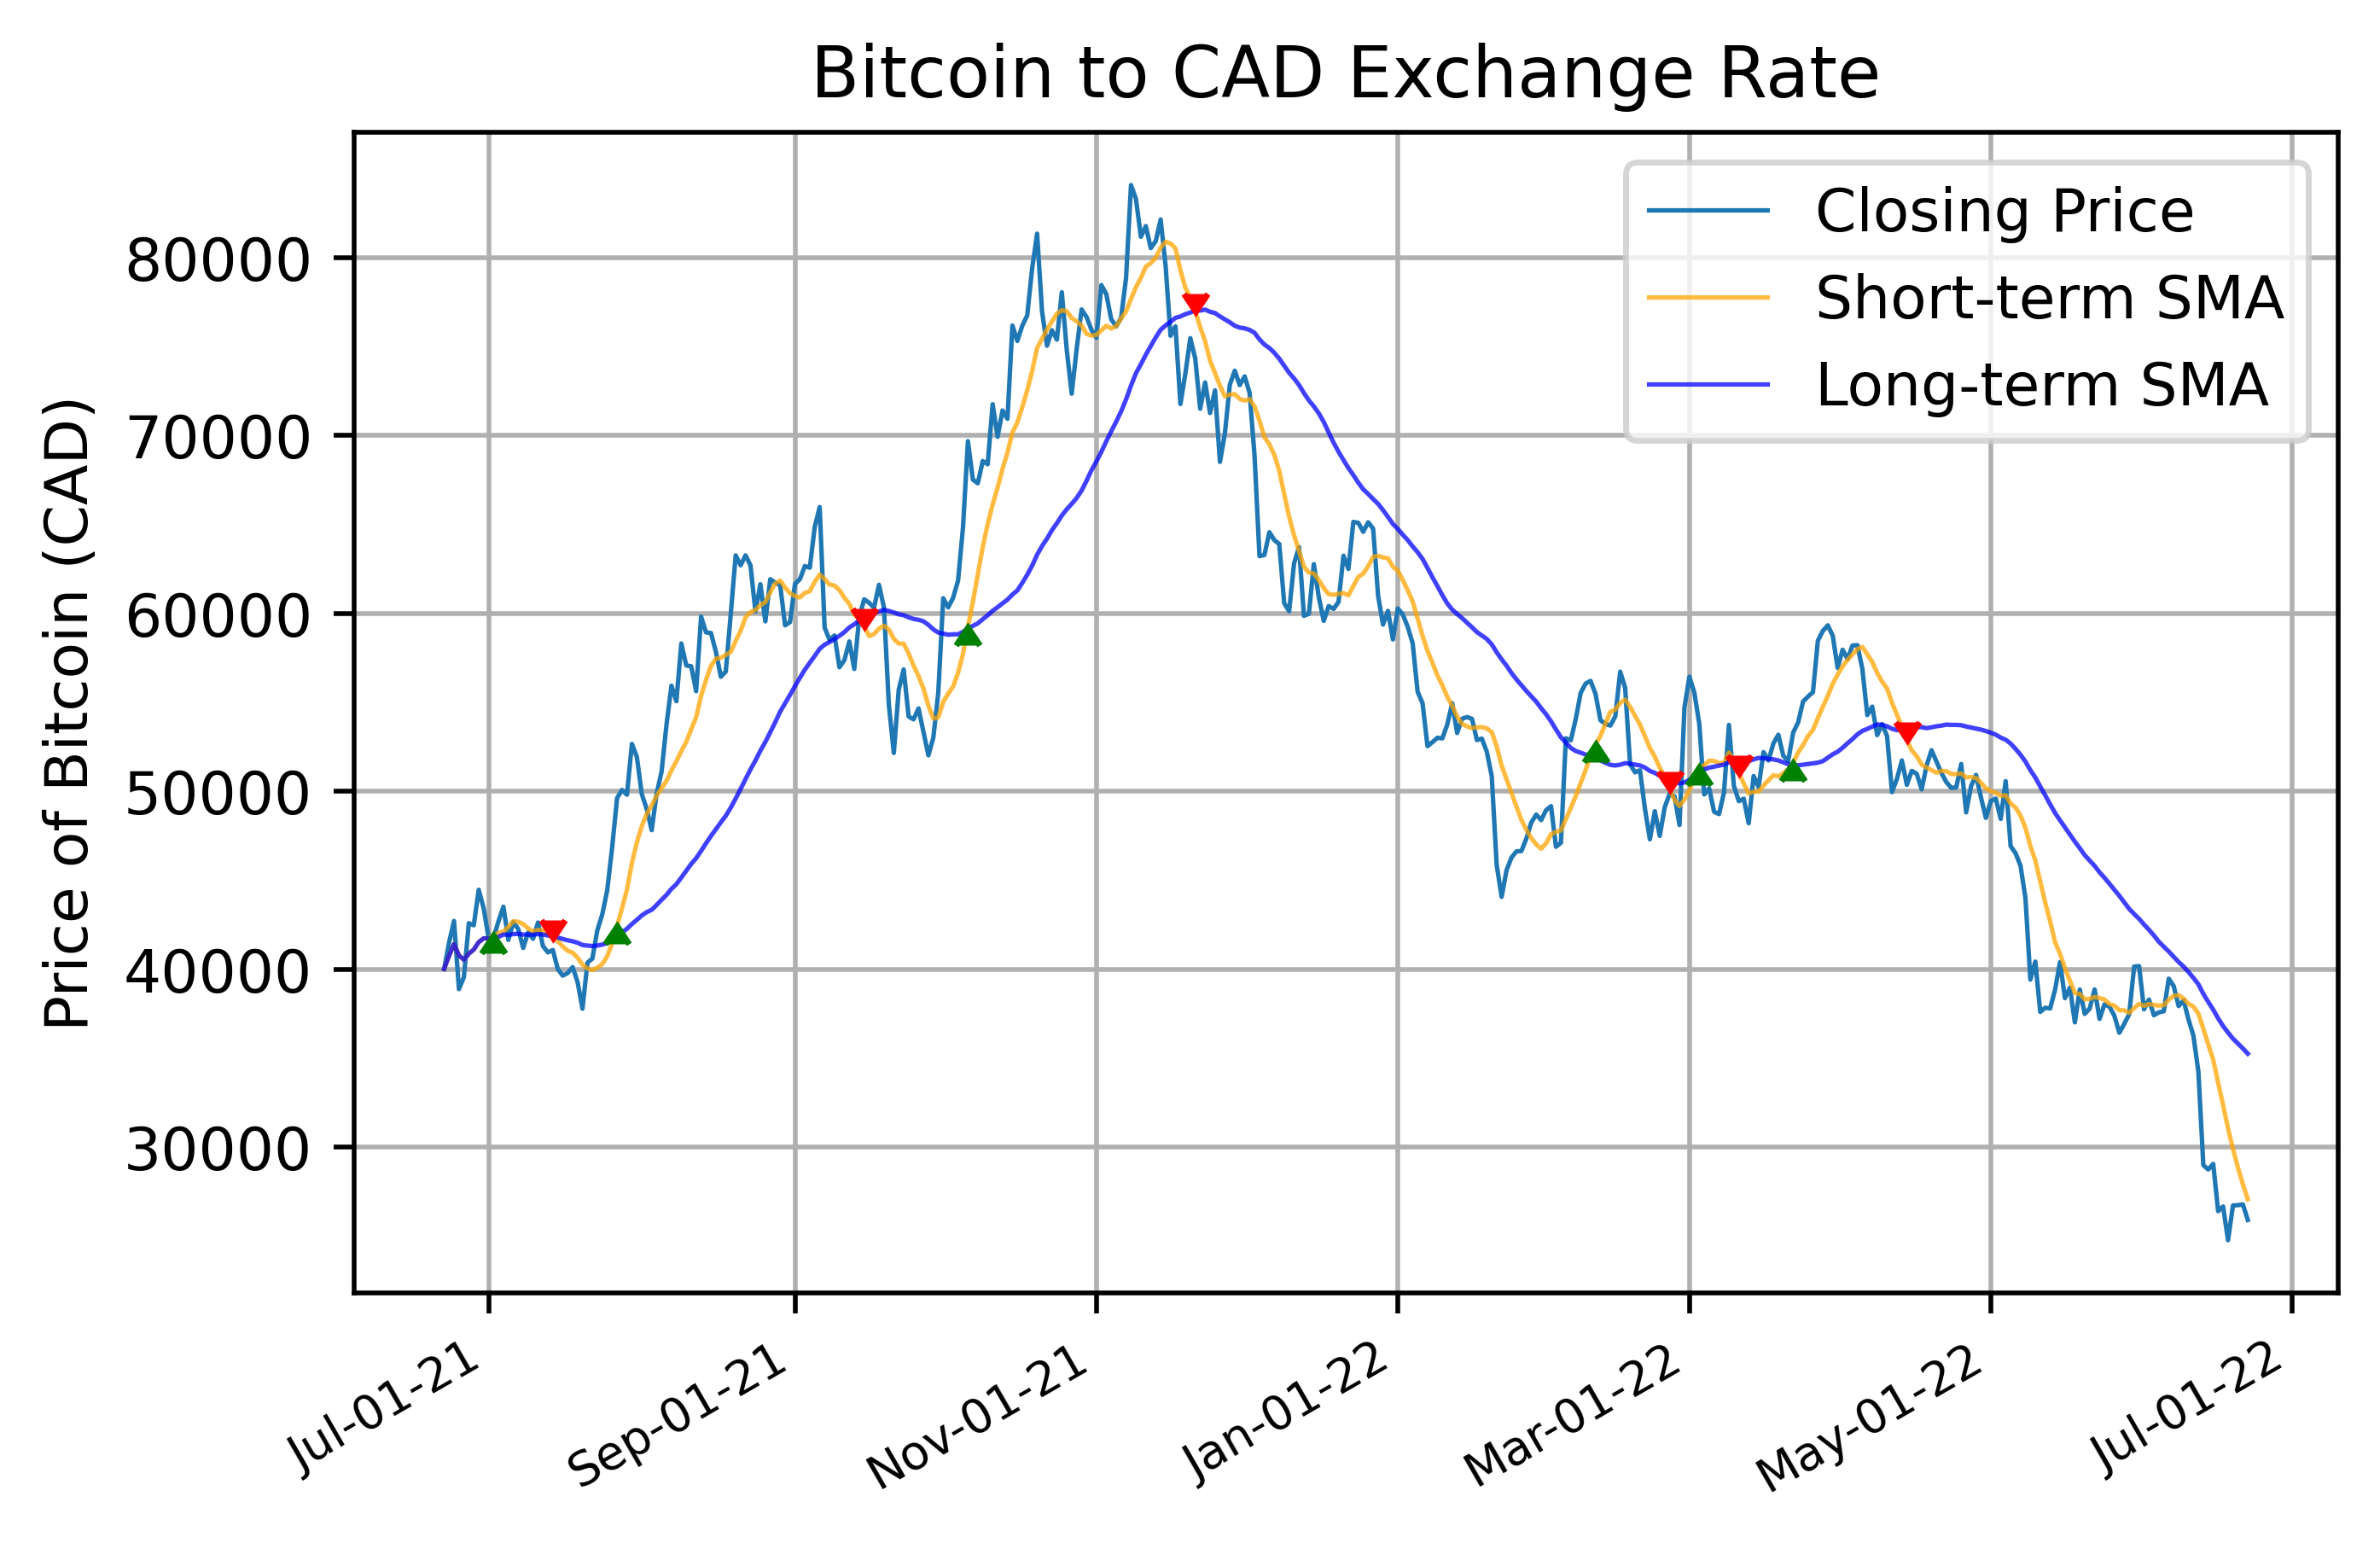

In [15]:
fig, axs = plt.subplots(dpi=500)


date_format = DateFormatter("%h-%d-%y")

axs.xaxis.set_major_formatter(date_format)
axs.tick_params(axis='x', labelsize=8)

fig.autofmt_xdate()


axs.plot(BTC_CAD['Close'], lw=0.75, label='Closing Price')

axs.plot(trade_signals['Short'], lw=0.75, alpha=0.75, color='orange', label='Short-term SMA')

axs.plot(trade_signals['Long'], lw=0.75, alpha=0.75, color='blue', label='Long-term SMA')


axs.plot(trade_signals.loc[trade_signals['Position']==1.0].index, trade_signals.Short[trade_signals['Position'] == 1.0],
 marker=6, ms=4, linestyle='none', color='green')

axs.plot(trade_signals.loc[trade_signals['Position'] == -1.0].index, trade_signals.Short[trade_signals['Position'] == -1.0],
 marker=7, ms=4, linestyle='none', color='red')


axs.set_ylabel('Price of Bitcoin (CAD)')
axs.set_title('Bitcoin to CAD Exchange Rate')

axs.grid() 
axs.legend()

plt.show()

In [16]:
initial_balance = 10000.0 #ten thousand CAD


backtest = pd.DataFrame(index=trade_signals.index)


backtest['BTC_Return'] = BTC_CAD['Close'] / BTC_CAD['Close'].shift(1) # Current closing price / yesterday's closing price


In [17]:
backtest['Alg_Return'] = np.where(trade_signals.Signal == 1, backtest.BTC_Return, 1.0)

In [18]:
backtest['Balance'] = initial_balance * backtest.Alg_Return.cumprod() 

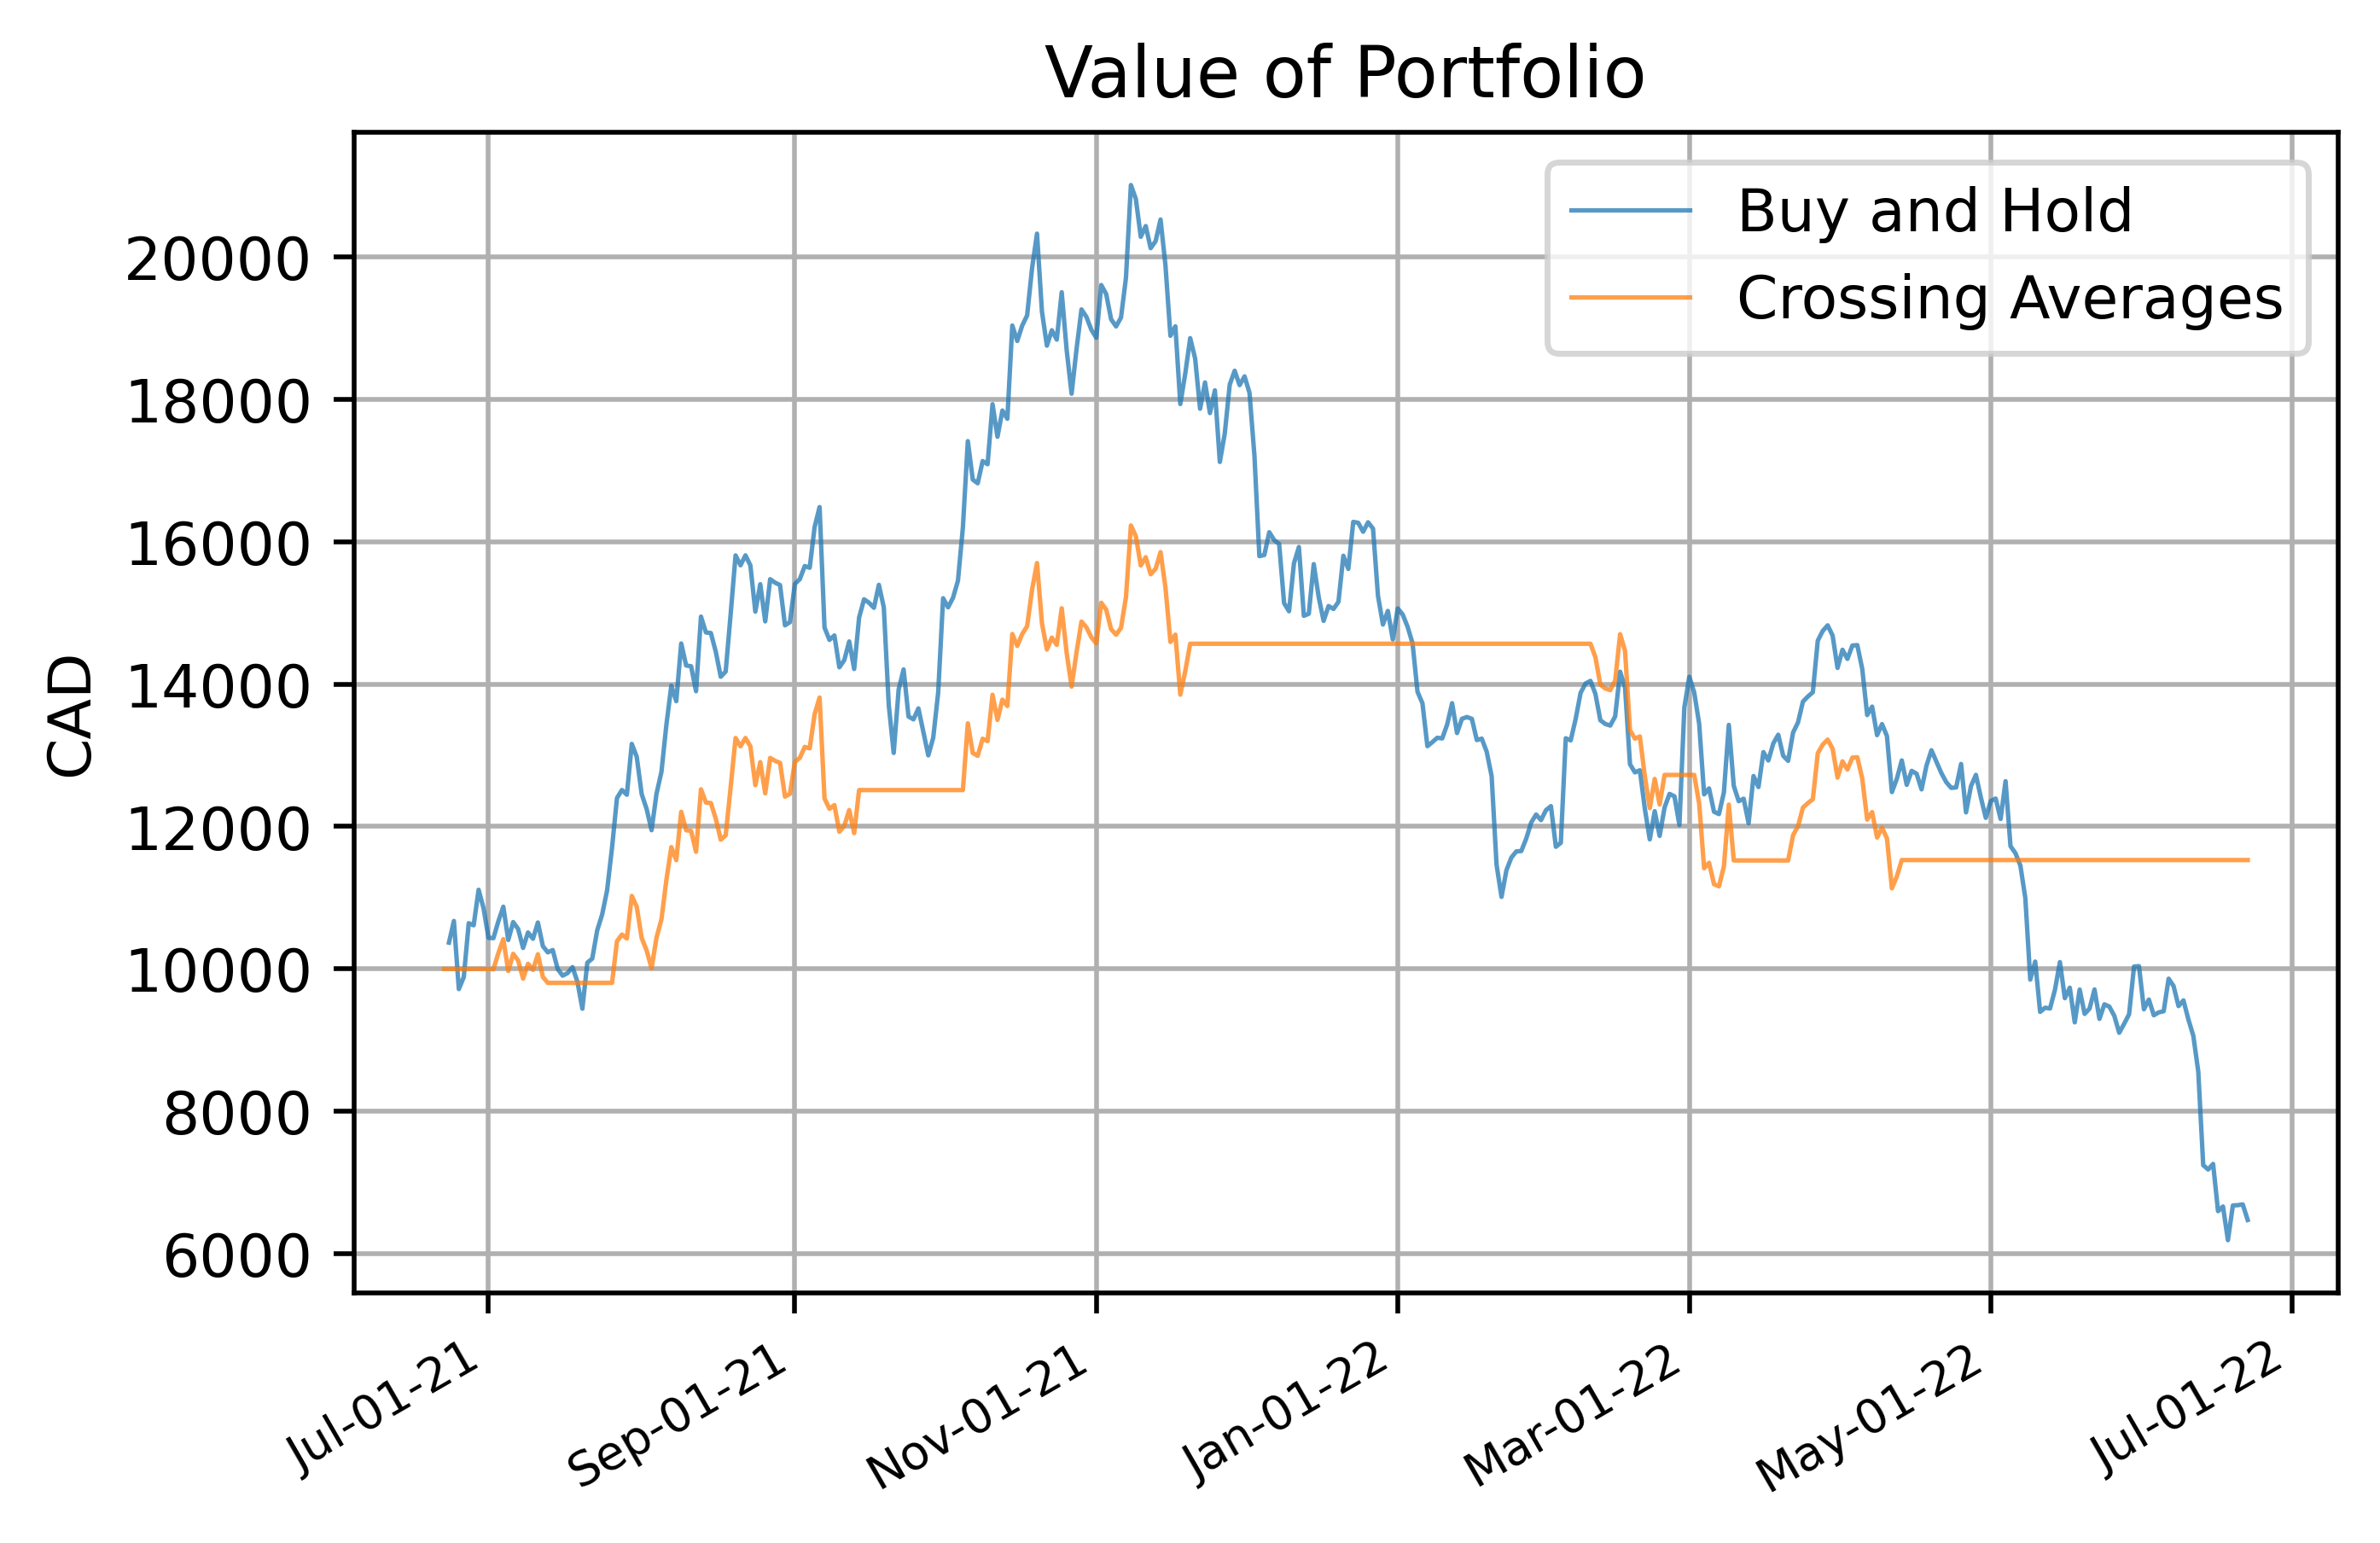

In [19]:
fig, ax = plt.subplots(dpi=500)


date_format = DateFormatter("%h-%d-%y")

ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)

fig.autofmt_xdate()


ax.plot(initial_balance*backtest.BTC_Return.cumprod(), lw=0.75, alpha=0.75, label='Buy and Hold')


ax.plot(backtest['Balance'], lw=0.75, alpha=0.75, label='Crossing Averages')


ax.set_ylabel('CAD')
ax.set_title('Value of Portfolio')

ax.grid() 
ax.legend()


plt.show()